In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### a.	Download a panel of CMT rates into pandas dataframe & remove ‘1M column from the dataset

In [23]:
CMT = pd.read_csv('CMT_Rates.csv')
CMT['Date'] = pd.to_datetime(CMT['Date'], format='%y/%m/%d')
CMT.set_index('Date',inplace=True)

In [24]:
CMT.head()

,1 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,
2012-01-03,0.01,0.02,0.06,0.12,0.27,0.40,0.89,1.41,1.97,2.67,2.98
2012-01-04,0.01,0.02,0.06,0.12,0.25,0.40,0.89,1.43,2.00,2.71,3.03
2012-01-05,0.01,0.02,0.07,0.11,0.27,0.40,0.88,1.43,2.02,2.74,3.06
2012-01-06,0.02,0.02,0.05,0.12,0.25,0.40,0.86,1.40,1.98,2.70,3.02
2012-01-09,0.01,0.01,0.05,0.11,0.26,0.38,0.85,1.39,1.98,2.70,3.02


In [25]:
CMT = CMT.drop(['1 MO'],axis=1)

In [26]:
CMT.head()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,
2012-01-03,0.02,0.06,0.12,0.27,0.40,0.89,1.41,1.97,2.67,2.98
2012-01-04,0.02,0.06,0.12,0.25,0.40,0.89,1.43,2.00,2.71,3.03
2012-01-05,0.02,0.07,0.11,0.27,0.40,0.88,1.43,2.02,2.74,3.06
2012-01-06,0.02,0.05,0.12,0.25,0.40,0.86,1.40,1.98,2.70,3.02
2012-01-09,0.01,0.05,0.11,0.26,0.38,0.85,1.39,1.98,2.70,3.02


### b.	Perform PCA on the dataset using Sample1

In [164]:
# Sample1:  2/1/2012 to 6/30/2015
CMT_sample1 = CMT['2012-02-01':'2015-06-30']
CMT_sample1.head()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,
2015-06-24,0.01,0.08,0.30,0.68,1.06,1.69,2.12,2.38,2.87,3.16
2015-06-25,0.01,0.07,0.29,0.68,1.06,1.70,2.14,2.40,2.88,3.16
2015-06-26,0.01,0.08,0.29,0.72,1.09,1.75,2.20,2.49,2.98,3.25
2015-06-29,0.02,0.11,0.27,0.64,1.00,1.62,2.05,2.33,2.82,3.09
2015-06-30,0.01,0.11,0.28,0.64,1.01,1.63,2.07,2.35,2.83,3.11


In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(CMT_sample1.diff(periods=1).dropna())
eigenvalues = pca.explained_variance_
eigenvector = pca.components_
print ('eigenvalues')
print (eigenvalues)
print ('eigenvector')
print (eigenvector)

eigenvalues
[1.08258769e-02 9.35625110e-04 1.74057599e-04 1.32458826e-04
 7.78853295e-05 6.70804158e-05 5.17593644e-05 3.89128303e-05
 3.01305451e-05 2.72460982e-05]
eigenvector
[[ 0.00730172  0.01010843  0.03307308  0.15036732  0.24463793  0.38559728
   0.45070971  0.44336958  0.43694629  0.4206774 ]
 [ 0.01486984  0.02950121  0.09952627  0.40384706  0.50246457  0.40023556
   0.16306139 -0.1022637  -0.3930861  -0.47083748]
 [ 0.32563337  0.3415867   0.3169274   0.5794911   0.12793935 -0.2585456
  -0.36437906 -0.12795794  0.13664897  0.29999323]
 [ 0.63572923  0.51574531  0.17893008 -0.4404198  -0.08238826  0.11647321
   0.17828081  0.1192845  -0.07371947 -0.17907626]
 [-0.056968   -0.14082638  0.26964383 -0.52257353  0.70003561 -0.06833373
  -0.22619341 -0.17131897  0.01181534  0.23613363]
 [-0.35160034 -0.032979    0.85504652 -0.0172347  -0.2805437  -0.04289212
   0.1912424   0.10186985 -0.12271938 -0.03650099]
 [-0.59872309  0.76866417 -0.16703306 -0.07724623  0.09603464  0.00452328

### c.i) Plot CMT curve move vs the move explained by the first PCA factor, first 2 PCA factors, first 3 PCA factors

In [146]:
CMT_election = CMT['2016-11-08':'2016-11-09']
CMT_election_diff = CMT_election.diff(periods=1).dropna()
CMT_election_diff

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,
2016-11-09,0.02,0.0,0.01,0.03,0.08,0.15,0.19,0.19,0.23,0.25


In [224]:
factor_matrix = np.matmul(eigenvector, CMT_election_diff.T)
factor_matrix

array([[ 0.45794047],
       [-0.08292704],
       [ 0.01140352],
       [ 0.00698408],
       [ 0.01785625],
       [-0.00953527],
       [-0.0106428 ],
       [ 0.02248571],
       [ 0.00863249],
       [ 0.00562564]])

In [225]:
PCA1 = np.matmul(eigenvector[0,:].reshape(10,1), factor_matrix[0,:])
PCA1

array([0.00334375, 0.00462906, 0.0151455 , 0.06885928, 0.11202961,
       0.1765806 , 0.20639822, 0.20303688, 0.20009539, 0.19264521])

In [226]:
PCA2 = PCA1 + np.matmul(eigenvector[1,:].reshape(10,1), factor_matrix[1,:])
PCA2

array([0.00211064, 0.00218261, 0.00689208, 0.03536944, 0.07036171,
       0.14339025, 0.19287602, 0.2115173 , 0.23269286, 0.23169036])

In [227]:
PCA3 = PCA2 + np.matmul(eigenvector[2,:].reshape(10,1), factor_matrix[2,:])
PCA3

array([0.00582401, 0.0060779 , 0.01050617, 0.04197768, 0.07182067,
       0.14044192, 0.18872082, 0.21005813, 0.23425114, 0.23511134])

In [228]:
move1 = CMT_election['2016-11-08':'2016-11-08'].values + PCA1
move2 = CMT_election['2016-11-08':'2016-11-08'].values + PCA2
move3 = CMT_election['2016-11-08':'2016-11-08'].values + PCA3

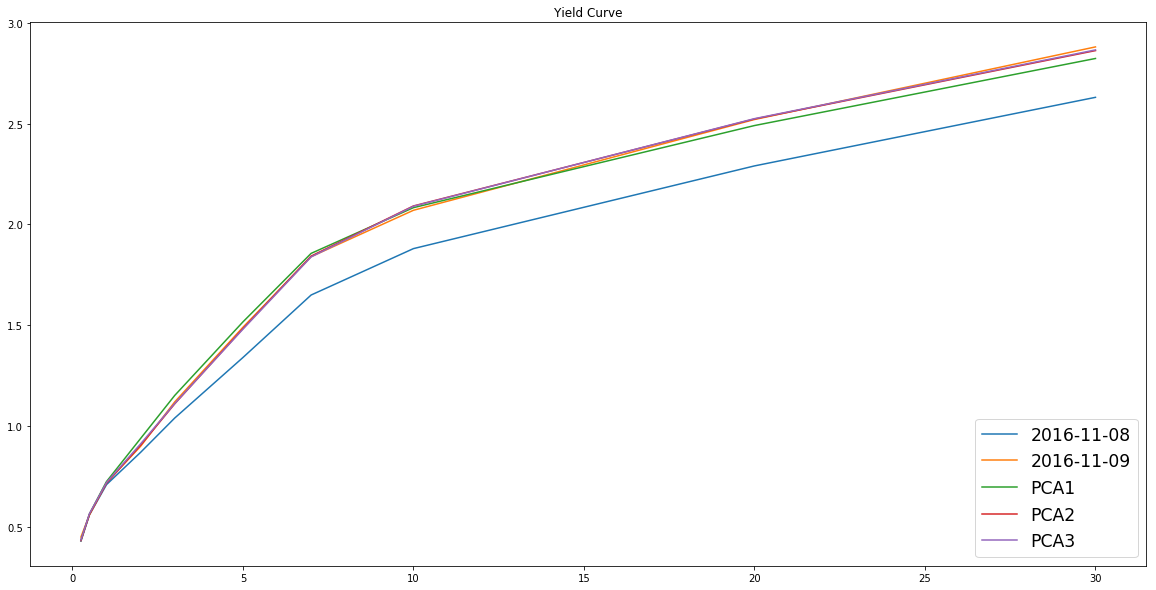

In [231]:
term = [3/12,6/12,1,2,3,5,7,10,20,30]
plt.figure(figsize=(20,10))
l1, = plt.plot(term, CMT_election.loc['2016-11-08'])
l2, = plt.plot(term, CMT_election.loc['2016-11-09'])
l3, = plt.plot(term, move1[0][:])
l4, = plt.plot(term, move2[0][:])
l5, = plt.plot(term, move3[0][:])
plt.legend(handles=[l1,l2,l3,l4,l5,], labels=['2016-11-08','2016-11-09','PCA1','PCA2','PCA3'], 
           loc='lower right',fontsize='xx-large') 
plt.title('Yield Curve')
plt.show()

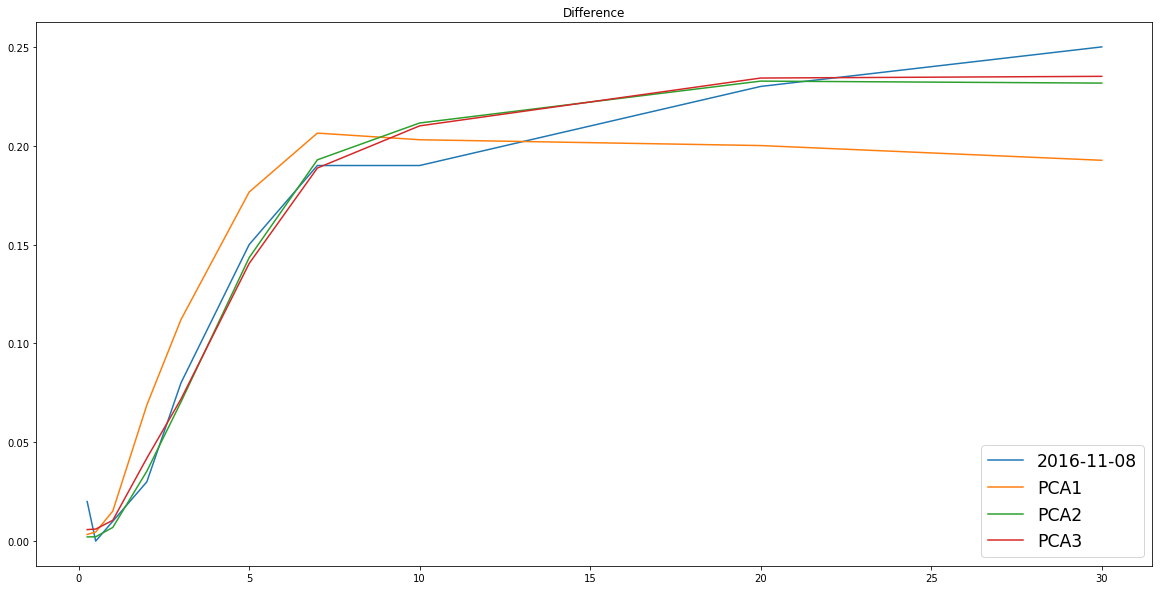

In [235]:
plt.figure(figsize=(20,10))
l1, = plt.plot(term, CMT_election_diff.loc['2016-11-09'])
l2, = plt.plot(term, PCA1)
l3, = plt.plot(term, PCA2)
l4, = plt.plot(term, PCA3)
plt.legend(handles=[l1,l2,l3,l4,], labels=['2016-11-08','PCA1','PCA2','PCA3'], 
           loc='lower right',fontsize='xx-large') 
plt.title('Difference')
plt.show()

### c.ii)	Explain your calculations and results

In [230]:
print ('move explained by PCA1')
print (move1[0][:])
print ('move explained by PCA2')
print (move2[0][:])
print ('move explained by PCA3')
print (move3[0][:])

move explained by PCA1
[0.43334375 0.56462906 0.7251455  0.93885928 1.15202961 1.5165806
 1.85639822 2.08303688 2.49009539 2.82264521]
move explained by PCA2
[0.43211064 0.56218261 0.71689208 0.90536944 1.11036171 1.48339025
 1.84287602 2.0915173  2.52269286 2.86169036]
move explained by PCA3
[0.43582401 0.5660779  0.72050617 0.91197768 1.11182067 1.48044192
 1.83872082 2.09005813 2.52425114 2.86511134]


As we can see from the above graph and the above result for move explained by PCA1, PCA2 and PCA3 that PCA method can explain most of the move. The more PCA factors are involved, the more explained by PCA.

### d.	Compute weights of the WFLY to make sure that WFLY does not have PCA1,2 risk exposure in Sample1.  Let’s call this combination WFLY1

WFLY: 5Y*w1 – 7Y + 10Y*w2, weights = (w1,-1,w2)

In [163]:
# linear equation
# aw1+bw2=A, cw1+dw2=B
# 5Y_index=5, 7Y_index=6, 10Y_index=7

a = eigenvector[0,5]
b = eigenvector[0,7]
c = eigenvector[1,5]
d = eigenvector[1,7]
A = eigenvector[0,6]
B = eigenvector[1,6]
WFLY1 = np.linalg.solve(np.array([[a,b],[c,d]]), np.array([A,B]))
print (WFLY1)

[0.54585503 0.54182674]


### e.	Choose weights of the WFLY from cointegration analysis (weights correspond to the best cointegrated vector).  Let’s call this combination WFLY2

Chou-Ng estimation procedure 

In [157]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def CCA_Chou_Ng(data_set):
    
    #data_set is pandas dataframe
    df_lag = data_set.shift(1).dropna()
    df = data_set.drop(data_set.index[0]).dropna()
    n = len(data_set.columns)
    
    #X(t) ~ M_1 + X(t-1)
    X = df_lag.as_matrix()
    X_I = sm.add_constant(X)
    Y = df.as_matrix()
    l1 = sm.OLS(Y,X_I).fit()
    B=l1.params[1:(n+1)]
    
    #X(t-1) ~ M_2 + X(t)
    Y_I = sm.add_constant(Y)
    l2 = sm.OLS(X,Y_I).fit()
    A=l2.params[1:(n+1)]
    C = np.dot(A,B)
    eig_val, eig_vec = np.linalg.eig(C)
    return eig_val, eig_vec, C

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [162]:
legs = ['5 YR', '10 YR']
belly = '7 YR'
flylist = [legs[0],belly, legs[1]]
CMT_sample_ = CMT_sample.ix[:,flylist]
n = len(CMT_sample1_WFLY2.columns)
val, vec, C = CCA_Chou_Ng(CMT_sample1_WFLY2)
vec = pd.DataFrame(vec)
vec = vec.rename(columns=lambda x: n-x-1, inplace=False)
# print (vec)
w = vec[2].values
WFLY2 = [-w[0]/w[1],-w[2]/w[1]]
print (WFLY2)

[0.6778733287021792, 0.45646563750085384]


### 3.	Compute Half-Life & ADF statistic for WFLY2 using Sample1

Compute time series of WFLY2 in sample1 time period

In [202]:
w1 = WFLY2[0]
w2 = WFLY2[1]
weight2 = [w1,-1,w2]

CMT_sample1_WFLY2_ts = np.sum(CMT_sample1_WFLY2 * weight2, axis=1)

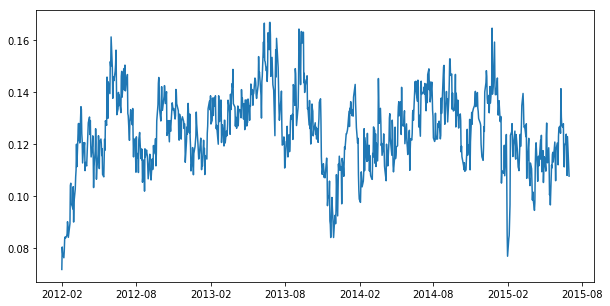

In [212]:
plt.figure(figsize=(10,5))
plt.plot(CMT_sample1_WFLY2_ts)
plt.show()

half life

In [262]:
def half_life(data_set):
    md = sm.OLS(data_set.diff(), sm.add_constant(data_set.shift()), missing='drop')
    mdf = md.fit()
    half_life = -np.log(2)/mdf.params[1]
    halflife = np.round(half_life,1)
    return halflife

In [263]:
half_life(CMT_sample1_WFLY2_ts)

5.4

ADF test

In [264]:
import statsmodels.tsa.stattools as ts
ts.adfuller(CMT_sample1_WFLY2_ts, maxlag=1)

(-6.260595011568662,
 4.232765569046709e-08,
 1,
 853,
 {'1%': -3.438039434877692,
  '10%': -2.5685773775887872,
  '5%': -2.8649342774762423},
 -5996.550139814136)

conclusion: the WFLY2 time series has 5.4-day half-life. Through ADF test, p=4.23e-08<0.05, the time series is stable

### 4.	Repeat Step #3 out-of-sample: using 3m, 6m, 12m out of sample periods

3 months

In [247]:
CMT_OutOfSample1_WFLY2 = CMT.ix['2015-07-01':'2015-9-30',flylist]
CMT_OutOfSample1_WFLY2_ts = np.sum(CMT_OutOfSample1_WFLY2 * weight2, axis=1)

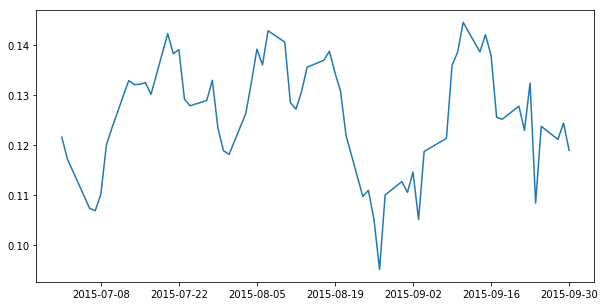

In [248]:
plt.figure(figsize=(10,5))
plt.plot(CMT_OutOfSample1_WFLY2_ts)
plt.show()

In [265]:
half_life(CMT_OutOfSample1_WFLY2_ts)

3.2

In [250]:
ts.adfuller(CMT_OutOfSample1_WFLY2_ts, maxlag=1)

(-2.6861259499573538,
 0.07647000970612587,
 0,
 63,
 {'1%': -3.5386953618719676,
  '10%': -2.591896782564878,
  '5%': -2.9086446751210775},
 -433.8459964727772)

6 months

In [254]:
CMT_OutOfSample2_WFLY2 = CMT.ix['2015-07-01':'2015-12-31',flylist]
CMT_OutOfSample2_WFLY2_ts = np.sum(CMT_OutOfSample2_WFLY2 * weight2, axis=1)

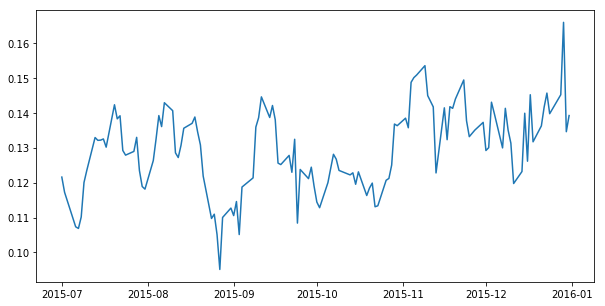

In [255]:
plt.figure(figsize=(10,5))
plt.plot(CMT_OutOfSample2_WFLY2_ts)
plt.show()

In [266]:
half_life(CMT_OutOfSample2_WFLY2_ts)

2.9

In [257]:
ts.adfuller(CMT_OutOfSample2_WFLY2_ts, maxlag=1)

(-3.0723683181577273,
 0.028666792017278904,
 1,
 124,
 {'1%': -3.484219653271961,
  '10%': -2.579359138917794,
  '5%': -2.885145235641637},
 -852.6074036915784)

12 months

In [258]:
CMT_OutOfSample3_WFLY2 = CMT.ix['2015-07-01':'2016-6-30',flylist]
CMT_OutOfSample3_WFLY2_ts = np.sum(CMT_OutOfSample3_WFLY2 * weight2, axis=1)

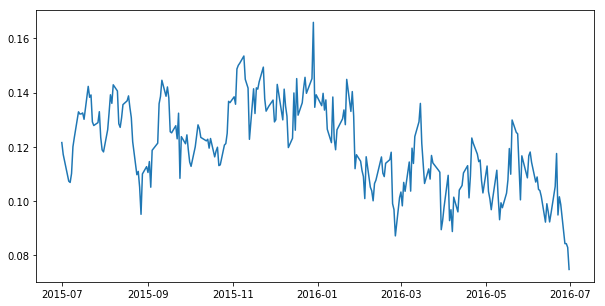

In [259]:
plt.figure(figsize=(10,5))
plt.plot(CMT_OutOfSample3_WFLY2_ts)
plt.show()

In [267]:
half_life(CMT_OutOfSample3_WFLY2_ts)

5.3

In [261]:
ts.adfuller(CMT_OutOfSample3_WFLY2_ts, maxlag=1)

(-2.5703646496738934,
 0.099278275388125,
 1,
 249,
 {'1%': -3.4568881317725864,
  '10%': -2.5729936189738876,
  '5%': -2.8732185133016057},
 -1694.8794183616221)

Conclusion:
When the out-of-sample periods increase, the half-life increases. For 6 months period, the time series is stable, however, for 3 month and 12 month period the time series is not stable.